In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#EXPLORATORY DATA ANALYSIS
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df["label"].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


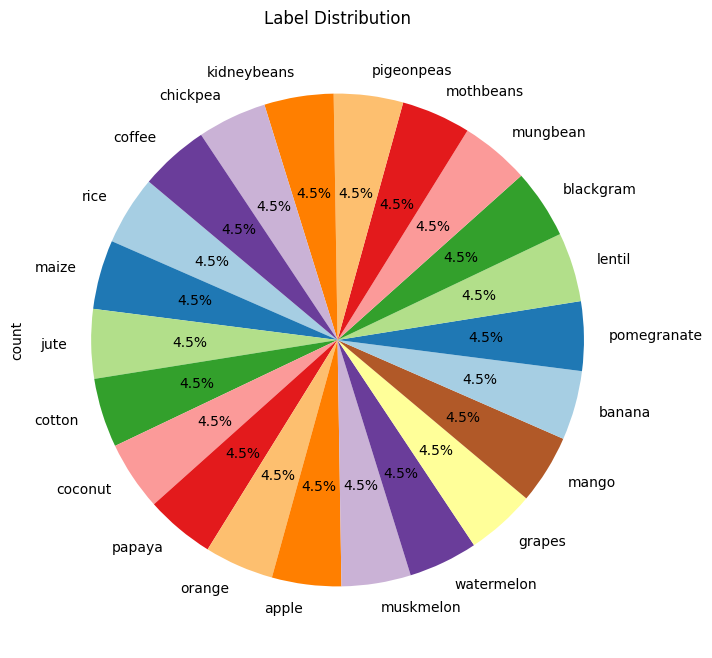

In [ ]:
label_counts = df["label"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
label_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Label Distribution')
plt.show()

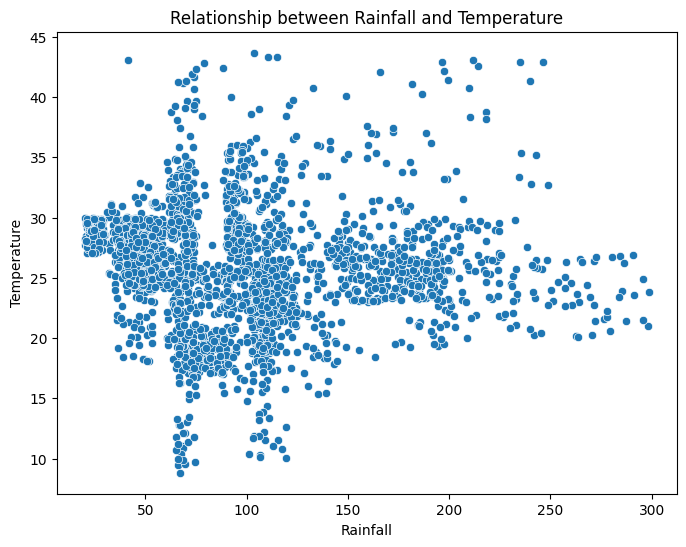

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["rainfall"], y=df["temperature"])
plt.title('Relationship between Rainfall and Temperature')
plt.xlabel('Rainfall')
plt.ylabel('Temperature')
plt.show()

In [ ]:
df["temperature"].describe()

,temperature
count,2200.000000
mean,25.616244
std,5.063749
min,8.825675
25%,22.769375
50%,25.598693
75%,28.561654
max,43.675493


In [ ]:
df["rainfall"].describe()

,rainfall
count,2200.000000
mean,103.463655
std,54.958389
min,20.211267
25%,64.551686
50%,94.867624
75%,124.267508
max,298.560117


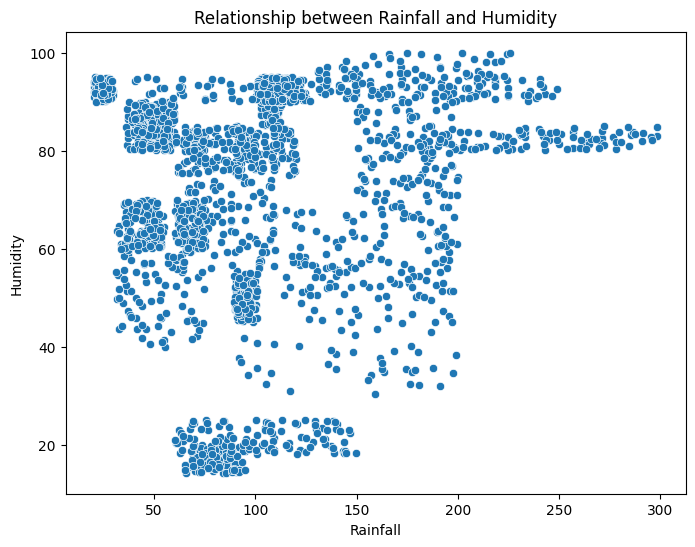

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["rainfall"], y=df["humidity"])
plt.title('Relationship between Rainfall and Humidity')
plt.xlabel('Rainfall')
plt.ylabel('Humidity')
plt.show()

**Modeling**

In [ ]:
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.ensemble import RandomForestClassifier   # The Random Forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
class_labels = df['label'].unique().tolist()
class_labels

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [ ]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
df['label']

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9954545454545455


In [ ]:
best_rf = grid_search.best_estimator_
test_score = best_rf.score(x_test, y_test)
print("Test Set Score:", test_score)

Test Set Score: 0.9931818181818182


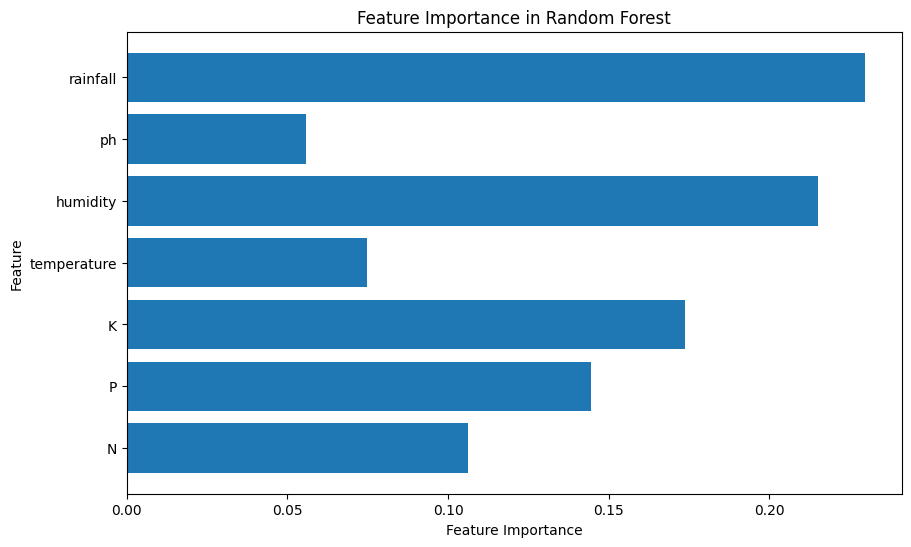

In [ ]:
#feature importance

feature_importances = grid_search.best_estimator_.feature_importances_  # Access feature importances from the fitted best estimator
feature_names = x

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [1]:
#CHECKING WHAT CROP EACH NUMBER REPRESENT
label_dict = {}
for index,label in enumerate(class_labels):
    label_dict[label] = index

print(label_dict)

NameError: name 'class_labels' is not defined

The code above shows what crop each number represents from 0-20

Now, let us try some predictions with our highly performing model

Firstly,we will create a Pandas Series named pred_series with values initialized to zero. The length of the Series matches the number of columns in features_data['columns'], and each entry is indexed by the corresponding column name. This Series can be used to store or manipulate values related to each feature in the dataset

In [ ]:
#creating a feature_data list
features_data = {'columns':list(x.columns)}

#creating a pandas series
pred_series = pd.Series(np.zeros(len(features_data['columns'])),index=features_data['columns'])
pred_series

,0
N,0.0
P,0.0
K,0.0
temperature,0.0
humidity,0.0
ph,0.0
rainfall,0.0


We will input random numbers into the generated series above to see what crop the model predicts with these inputs

In [ ]:
pred_series['N'] = 20
pred_series['P'] = 12
pred_series['K'] = 13
pred_series['temperature'] = 32
pred_series['humidity'] = 45
pred_series['ph'] = 5
pred_series['rainfall'] = 280

In [ ]:
output = best_rf.predict([pred_series])[0]
print("Recommended Crop:",class_labels[output])

Recommended Crop: orange


**Therefore, with the above environmental conditions or inputs, the recommended crop by the model is "JUTE".**

In [ ]:
#save the model in joblib
import joblib
joblib.dump(best_rf,'crop_recommendation_model.joblib')


['crop_recommendation_model.joblib']